
I'm trying to take random samples of length k from each line in a string of text to create a list of text chunks

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


In [551]:
ctdc = pd.read_csv("/home/nizam/Desktop/CTDC/data.csv")
ctdc.drop(['Unnamed: 63',
       'Unnamed: 64', 'Unnamed: 65', 'Unnamed: 66', 'Unnamed: 67',
       'Unnamed: 68', 'Unnamed: 69', 'Unnamed: 70', 'Unnamed: 71',
       'Unnamed: 72', 'Unnamed: 73', 'Unnamed: 74', 'Unnamed: 75'],axis=1,inplace=True)
ctdc.replace('-99','unknown',inplace=True)
ctdc.replace(-99,'unknown',inplace=True)
ctdc.shape

/usr/lib/python3/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (5,45,46,48,51,68,69,70) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(48801, 63)

In [510]:
ctdc.columns

Index(['yearOfRegistration', 'Datasource', 'gender', 'ageBroad',
       'majorityStatus', 'majorityStatusAtExploit', 'majorityEntry',
       'citizenship', 'meansOfControlDebtBondage',
       'meansOfControlTakesEarnings', 'meansOfControlRestrictsFinancialAccess',
       'meansOfControlThreats', 'meansOfControlPsychologicalAbuse',
       'meansOfControlPhysicalAbuse', 'meansOfControlSexualAbuse',
       'meansOfControlFalsePromises', 'meansOfControlPsychoactiveSubstances',
       'meansOfControlRestrictsMovement', 'meansOfControlRestrictsMedicalCare',
       'meansOfControlExcessiveWorkingHours', 'meansOfControlUsesChildren',
       'meansOfControlThreatOfLawEnforcement',
       'meansOfControlWithholdsNecessities',
       'meansOfControlWithholdsDocuments', 'meansOfControlOther',
       'meansOfControlNotSpecified', 'meansOfControlConcatenated',
       'isForcedLabour', 'isSexualExploit', 'isOtherExploit', 'isSexAndLabour',
       'isForcedMarriage', 'isForcedMilitary', 'isOrganRemova

### Zooming into data

In [552]:
from collections import Counter
for col in list(ctdc.columns):
    print("*"*20,col,"*"*20)
    print(Counter(ctdc[col]))
    print("-"*200)

******************** yearOfRegistration ********************
Counter({2016: 16399, 2017: 6508, 2018: 5818, 2015: 4276, 2014: 3000, 2013: 1832, 2005: 1455, 2006: 1423, 2007: 1417, 2012: 1367, 2011: 1340, 2002: 1026, 2010: 943, 2008: 802, 2009: 587, 2003: 357, 2004: 223, 2019: 28})
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
******************** Datasource ********************
Counter({'Case Management': 36289, 'Hotline': 12512})
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
******************** gender ********************
Counter({'Female': 35534, 'Male': 13267})
-----------------------------------------------------------------------------------------------------------------------

In [599]:
#from year 2009 to 2019(inclusive)
ctdc_9_19 = ctdc[ctdc['yearOfRegistration']>=2009]
ctdc_9_19.shape

(42098, 63)

/home/nizam/.local/lib/python3.6/site-packages/pandas/core/ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


Text(0.5, 1.0, 'No of trafficking cases registered from 2009 to 2019')

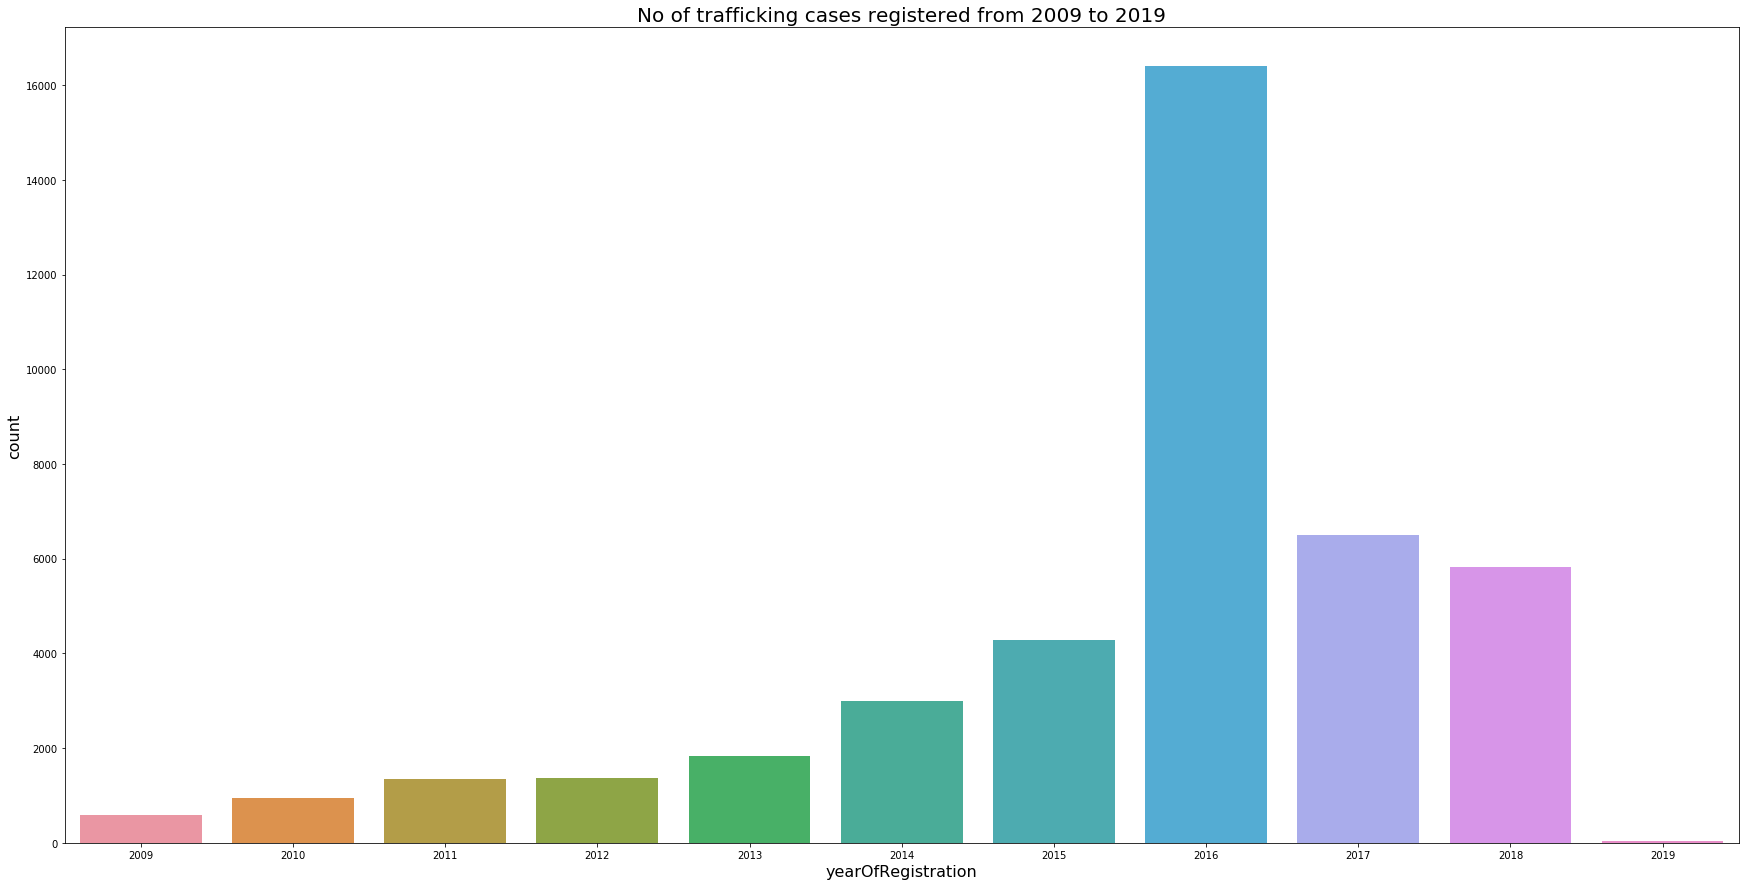

In [616]:
plt.figure(figsize=(30,15))
plt.xlabel('yearOfRegistration',size=16); plt.ylabel('count',size=16); 
sns.countplot(ctdc_9_19[ctdc_9_19['yearOfRegistration']!='unknown']['yearOfRegistration'])
plt.title('No of trafficking cases registered from 2009 to 2019',size=20)

**Observation**:There seem to be 2 trends in the number of cases registered, one from 2009 until 2016 and the other from 2016 until 2019.  
So, it makes sense to analyse data with an increasing trend, finding factors that made the trend behave in the way it does, and likewise for the decreasing trend from 2016 until 2019.

Text(0.5, 1.0, 'Age at the time exploitation(labour/sexual/organ) began.')

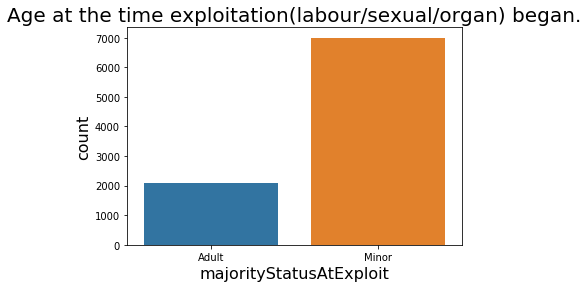

In [644]:
plt.xlabel('count',size=16); plt.ylabel('majorityStatusAtExploit',size=16); 
sns.countplot(ctdc_9_19[ctdc_9_19['majorityStatusAtExploit']!='unknown']['majorityStatusAtExploit'])
plt.title('Age at the time exploitation(labour/sexual/organ) began.',size=20)

Text(0.5, 1.0, 'Age at the time when case was registered')

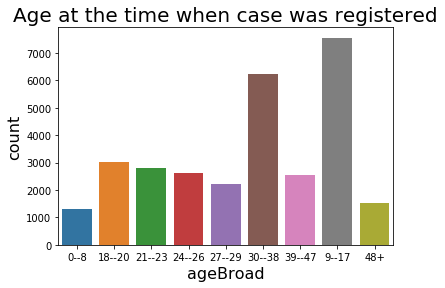

In [647]:
plt.xlabel('count',size=16); plt.ylabel('ageBroad',size=16); 
sns.countplot(ctdc_9_19[ctdc_9_19['ageBroad']!='unknown']['ageBroad'])
plt.title('Age at the time when case was registered',size=20)

/home/nizam/.local/lib/python3.6/site-packages/pandas/core/ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


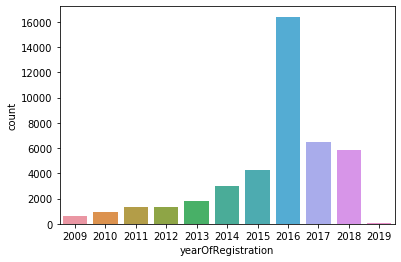

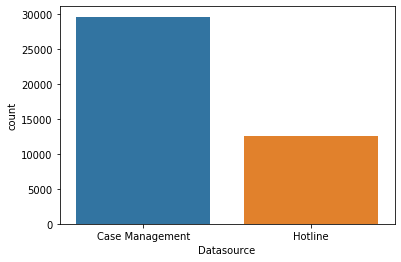

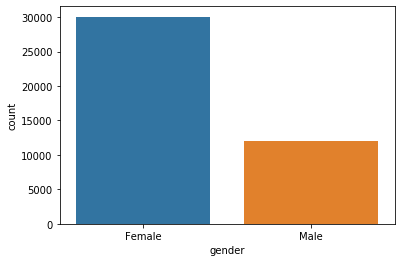

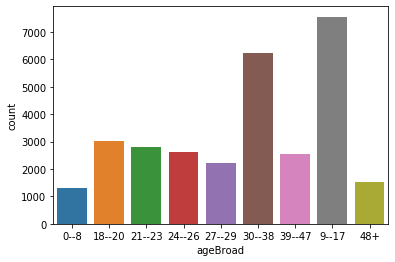

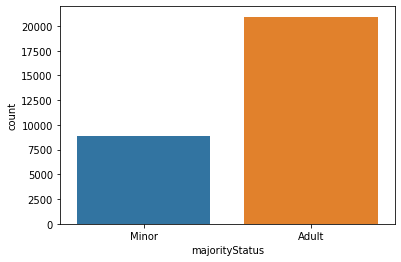

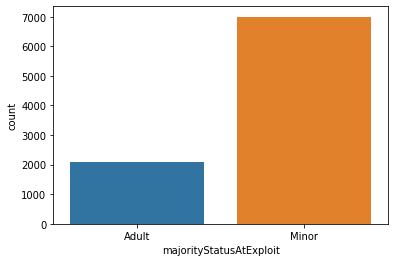

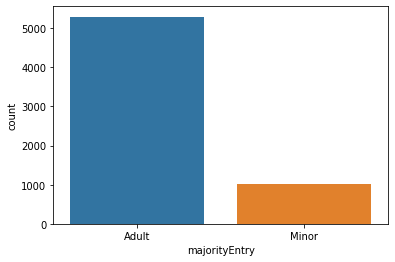

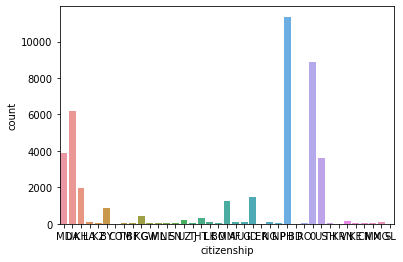

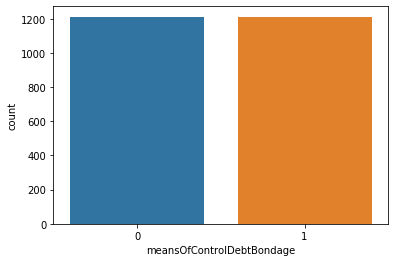

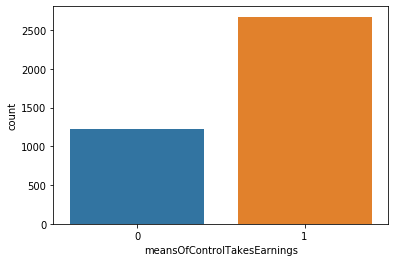

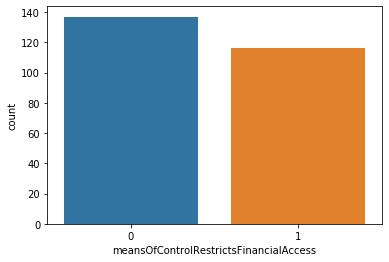

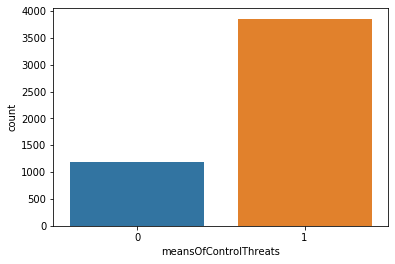

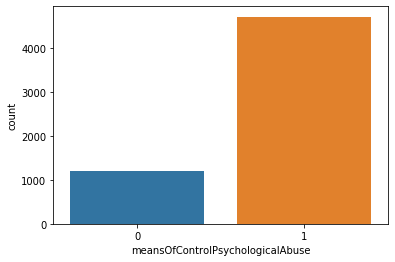

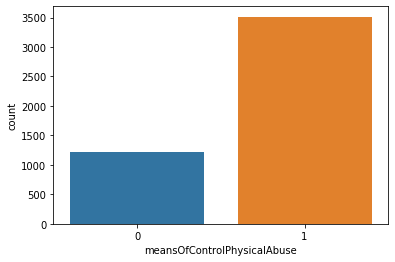

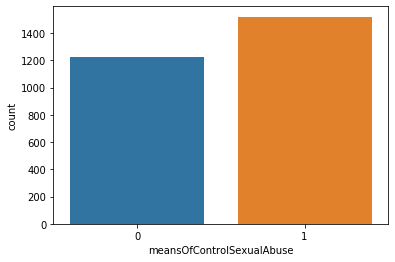

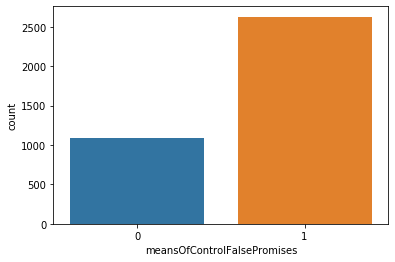

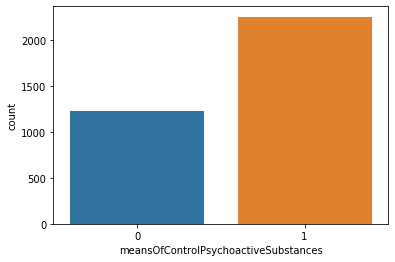

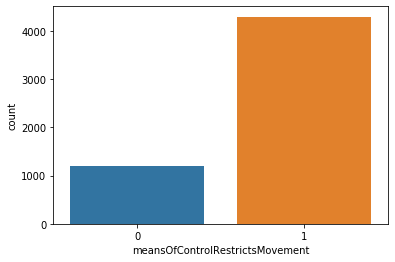

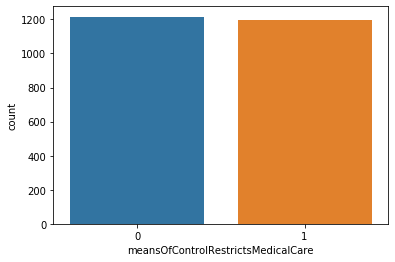

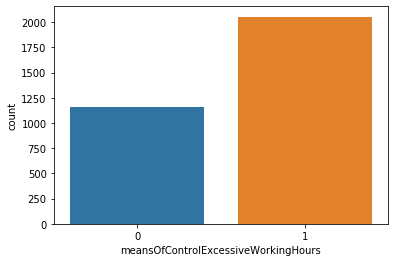

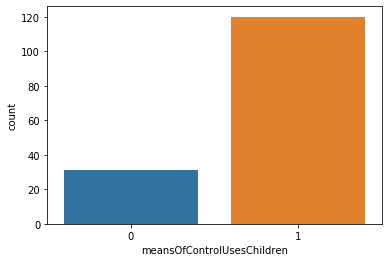

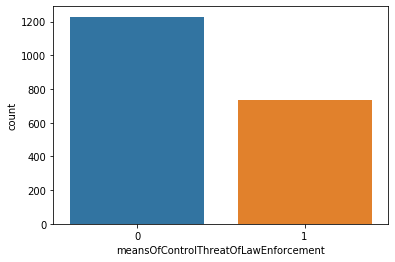

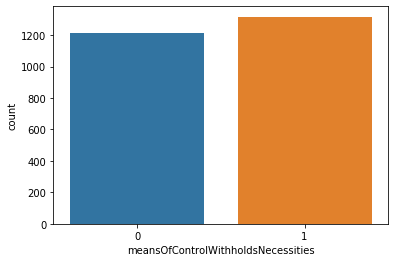

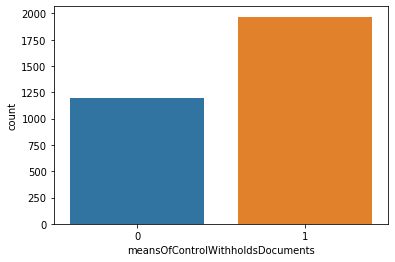

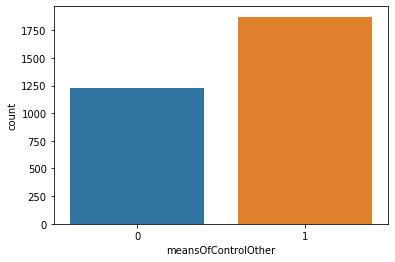

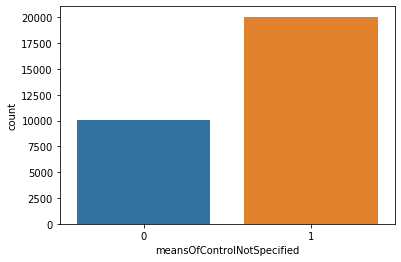

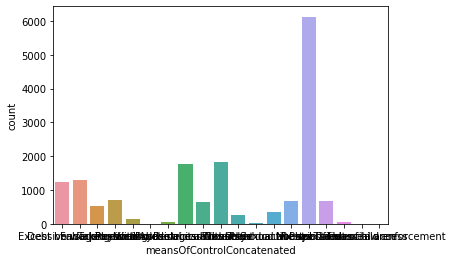

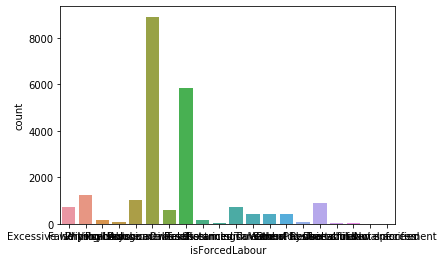

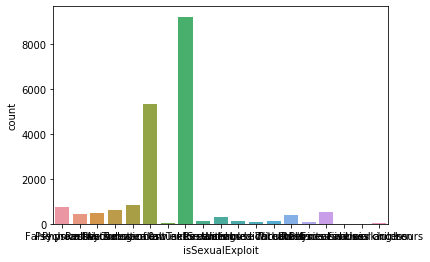

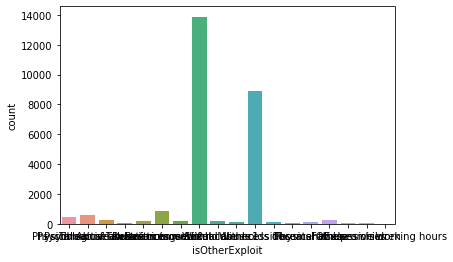

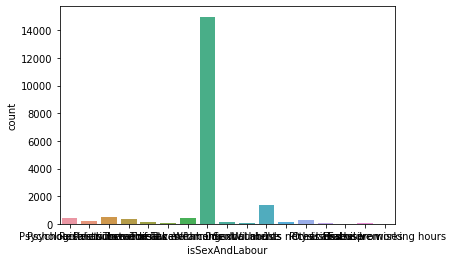

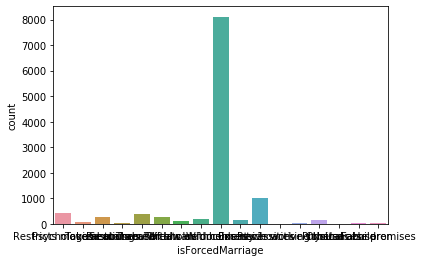

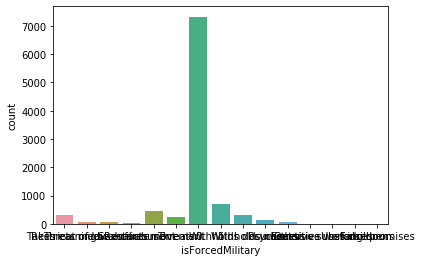

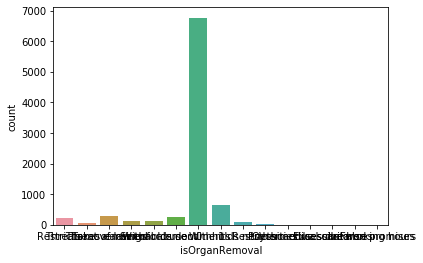

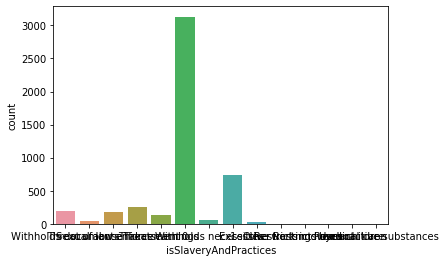

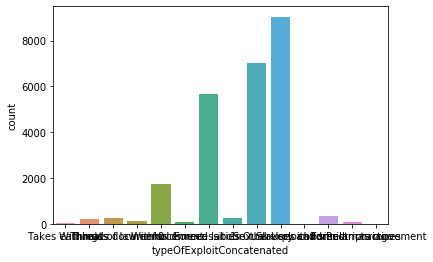

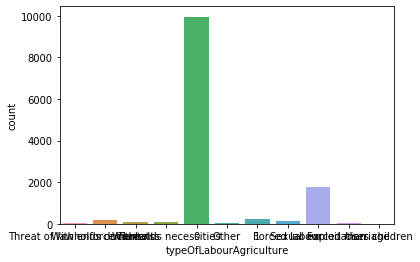

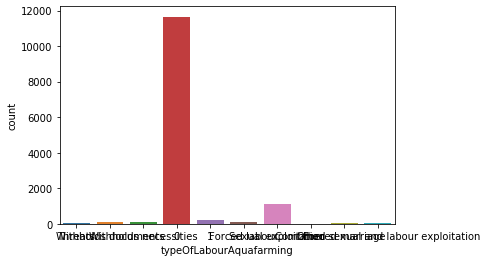

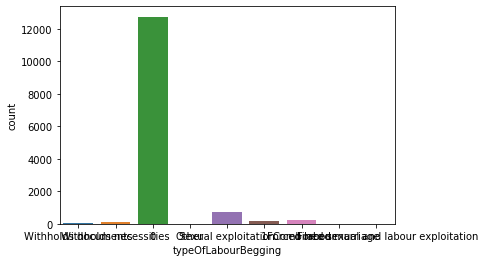

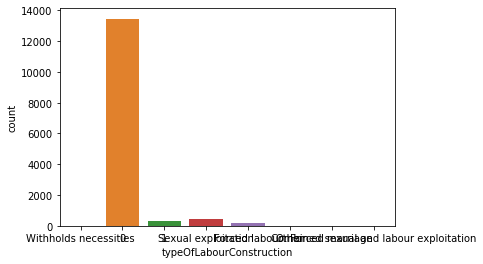

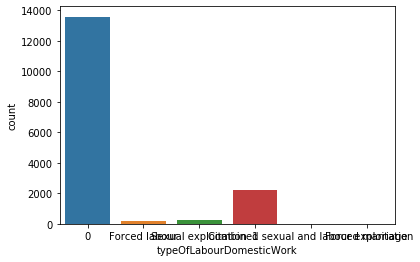

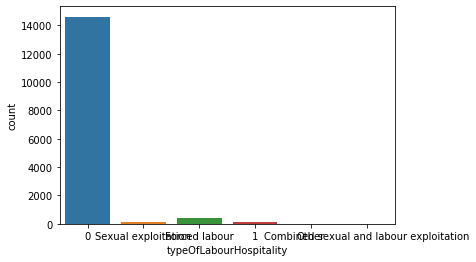

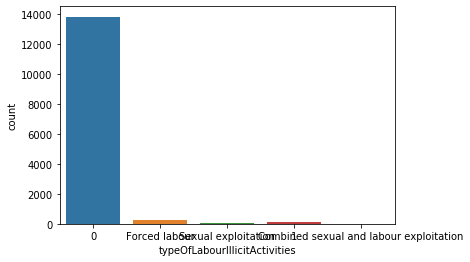

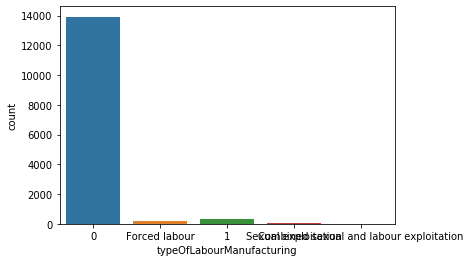

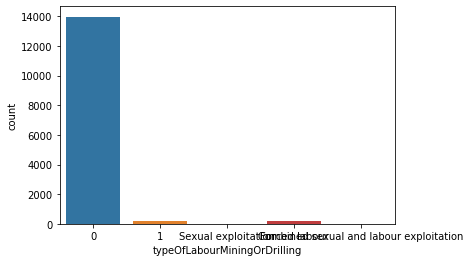

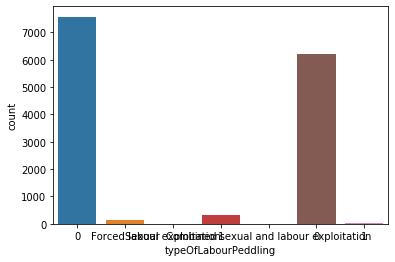

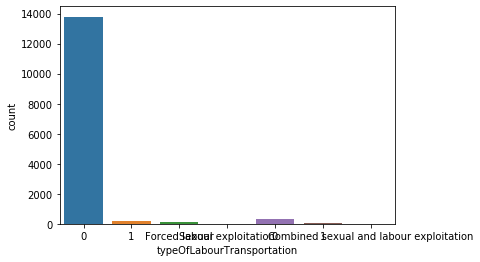

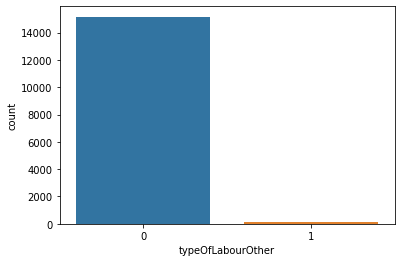

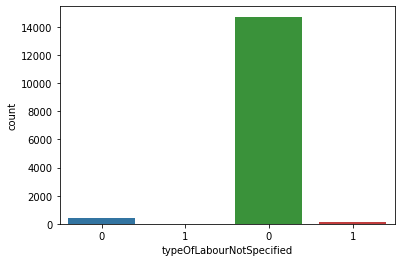

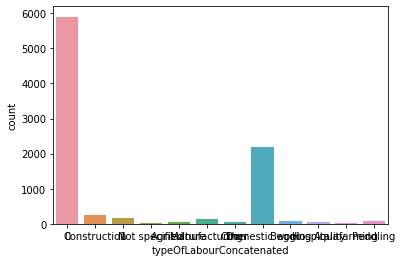

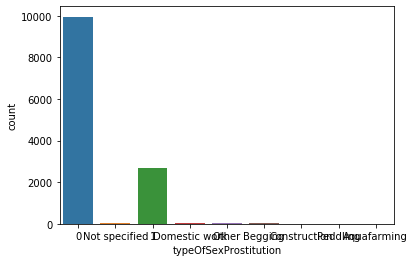

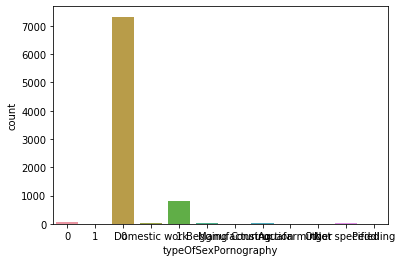

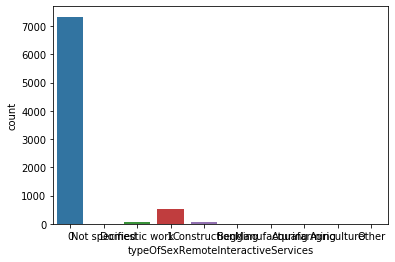

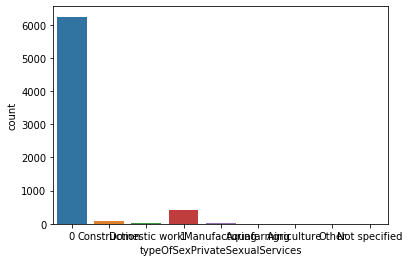

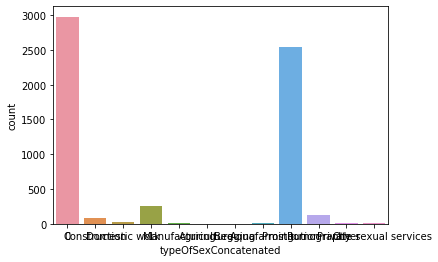

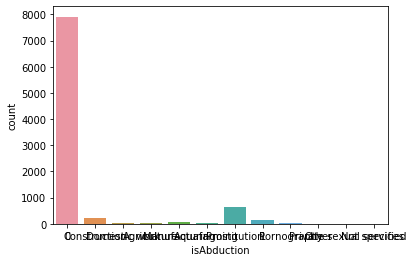

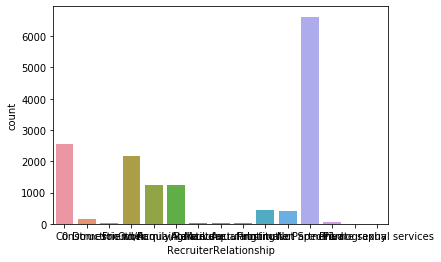

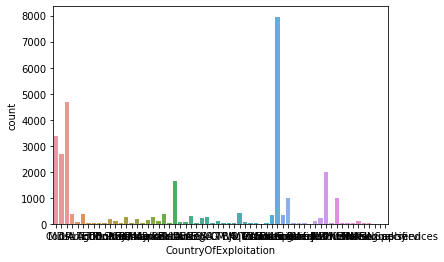

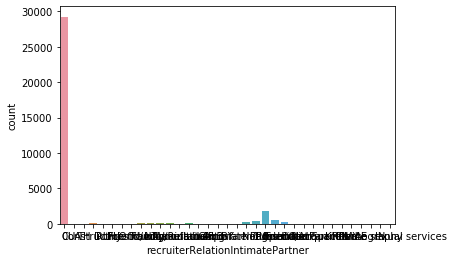

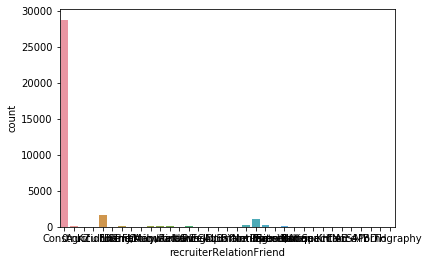

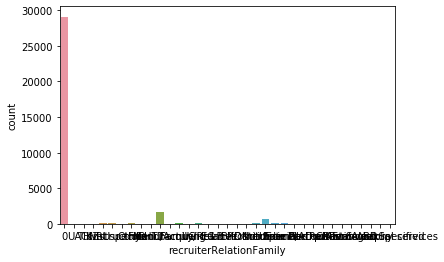

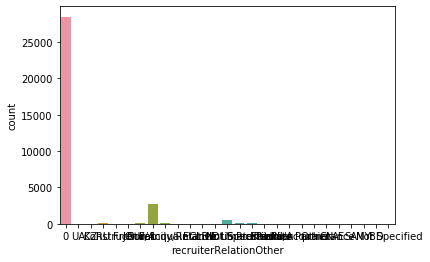

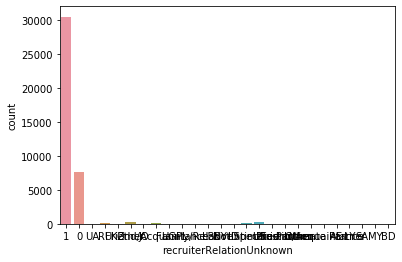

In [520]:
ctdc

,yearOfRegistration,Datasource,gender,ageBroad,majorityStatus,majorityStatusAtExploit,majorityEntry,citizenship,meansOfControlDebtBondage,meansOfControlTakesEarnings,...,typeOfSexPrivateSexualServices,typeOfSexConcatenated,isAbduction,RecruiterRelationship,CountryOfExploitation,recruiterRelationIntimatePartner,recruiterRelationFriend,recruiterRelationFamily,recruiterRelationOther,recruiterRelationUnknown
6565,2008,Case Management,Male,30--38,Adult,Adult,Adult,KG,0,1,...,0,0,0,0,0,0,0,0,0,Construction
6566,2008,Case Management,Male,30--38,Adult,Adult,Adult,KG,0,1,...,0,0,0,0,0,0,0,0,0,Construction
6568,2008,Case Management,Male,30--38,Adult,Adult,Adult,KG,-99,1,...,0,0,0,0,0,0,0,0,0,Construction
6572,2008,Case Management,Male,30--38,Adult,Adult,Adult,KG,1,1,...,0,0,0,0,0,0,0,0,0,Construction
6575,2008,Case Management,Male,30--38,Adult,Adult,Adult,KG,-99,1,...,0,0,0,0,0,0,0,0,0,Construction


In [466]:
'''
https://www.hackerrank.com/challenges/minimum-swaps-2/problem?h_l=interview&playlist_slugs%5B%5D=interview-preparation-kit&playlist_slugs%5B%5D=arrays
'''
arr=[2,6,4,5,1,3,7]
swaps = 0
current=arr[0:len(arr)]
if len(current)>0:
    high = max(current)
    if current.index(high)!= len(arr)-1:
        temp2 = current[len(arr)-1]
        current[current.index(high)]=temp2
        current[len(arr)-1] = high
        swaps+=1
    low = min(current)
    if current.index(low)!=0:
        temp2 = current[0]
        current[current.index(low)]=temp2
        current[0] = low
        swaps+=1
    current=current[1:len(arr)-1]
#print(current)
#print("-------------------1st iter ends-----")
st=0
en=len(current)-1
for i in range(len(current)):
    #print("st,en",st,en)
    #print("current:",current)
    if len(current)>0:
        high = max(current)
        if current.index(high)!=en:
            #print(current.index(high),en)
            temp2 = current[en]
            current[current.index(high)]=temp2
            current[en] = high
            #print(current)
            swaps+=1
        low = min(current)
        if current.index(low)!=st:
            #print(current.index(low),st)
            temp2 = current[st]
            current[current.index(low)]=temp2
            current[st] = low
            #print(current)
            swaps+=1
    st=st+1
    en=en-1
    current=current[st:en+1]#for extraction
    st=0
    en=len(current)-1
    #print("---------------------------")
print(swaps)


5


In [11]:
a=pd.read_csv('./Desktop/submission.csv')
b=pd.read_csv('./Desktop/submission_siavrez.csv')
from collections import Counter
Counter(a[800000:900000].open_channels.values)#mera


Counter({0: 91999, 1: 7243, 2: 749, 3: 8, 7: 1})

In [12]:
Counter(b[800000:900000].open_channels.values)#siavrez

Counter({0: 92223, 1: 7043, 2: 726, 3: 8})